# Books Recommendation system - Data Wrangling and EDA
## Capstone Project Two : Springboard Data Science career track
### Notebook by Debisree Ray


### Acknowledgement:
* Mentor: Max Sop 

* Springboard Team

* Book crossing (Cai-Nicolas Ziegler) for the data

* Cover image: Internet

## 1. Introduction - The Problem:

Online recommendation systems are the ‘in’ thing to do for many e-commerce websites. A recommendation system broadly recommends products to customers best suited to their tastes and traits. This project is focused around building various kinds of book recommendation engines; namely the Simple Generic Recommender, the Content-Based Filter and the User-Based Collaborative Filter. The performance of the systems will be evaluated in both a qualitative and quantitative manner.

<img src="book.png" align="center" width="100%"/>

## 2. The Client:

Any E-commerce business website or online book-selling portal is the potential customer.

## 3. The Data:

The data is from the 'Book Crossing dataset'. http://www2.informatik.uni-freiburg.de/~cziegler/BX/

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books, and ratings. All three (following) files are available in the CSV dump file (BX-CSV-Dump.zip).

* **BX-Book-Ratings.csv** (referred to as the rating file) has the following data fields:
     * **User ID: -**    The ID of the reviewer
     * **ISBN: -**     International Standard Book Number (Unique no. identifying the book)
     * **Book Rating: -**    Numeric (1-10) showing the rating
     
     
     
     
* **BX-Users.csv** (referred to as the users' file) has the following data fields:
     * **User ID: -**  The ID of the reviewer
     * **Location: -**  City of the reviewer
     * **Age: -**   Age of the reviewer
     
     
     
     
* **BX-Books.csv** (referred to the books file) has the following data fields:

     * **ISBN: -** International Standard Book Number (Unique no. identifying the book)
     * **Book Title: -** Title of the book
     * **Book Author: -** Author name
     * **Year of Publication: -** Year
     * **Publisher: -** Publisher name/company
     * **Image-URL-S: -** URL
     * **Image-URL-M: -** URL
     * **Image-URL-L: -** URL

## 4. The questions of interest:
The data analysis and story-telling report is organized around the following questions of interest:

* Can the ratings depend on the age of the reviewers?

* What are the unique features affecting the user rating?

* Is there any relation between the cities and the rating?

* Which location has the most and the least no. of the reviewers?

* Do the year of publication and the publisher's house name has any effect on the rating?

* Distribution of ratings by book
    - Most rated books
    - Highest rated books
    - Highest variance of ratings (most controversial books)

## 5. Data Wrangling:

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

**NumPy:** Provides a fast numerical array structure and helper functions.

**pandas:** Provides a DataFrame structure to store data in memory and work with it easily and efficiently.

**scikit-learn:** The essential Machine Learning package in Python.

**Matplotlib:** Basic plotting library in Python; most other Python plotting libraries are built on top of it.

**Seaborn:** Advanced statistical plotting library.

There are three datasets. So, we would import them and eventually merge them to build a final dataframe. 

* The first Dataset is the 'BX-Book-Ratings.csv'. It has three columns and 1149780 rows. The columns are 'User-ID', 'ISBN', and 'Book-Rating'. There are no missing values here.

* Second Dataset is the 'BX-Users.csv'. It also has the three columns but the number of rows are 278858. The columns are: 'User-ID', 'Location', and 'Age'. We can see that there are some missing values (39.7%) in the 'Age' column. 

* The third Dataset is the 'BX-Books.csv'. It has 8 columns and 271360 rows. The  columns are: 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication','Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'.The last three columns are not much use in our model building aspect. So we dropped them. There are mostly no missing values.


We have merged the dataframes using the 'Merge' function to construct the final data frame as 'final_df'. It has 1031136 rows and 9 columns. The columns are as 'User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Location', and 'Age'. (The description of the data fields are given above.)

'Age' column has 26.94% missing values.

In [1]:
#import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

#reading the 1st dataset:

rate= pd.read_csv('BX-Book-Ratings.csv', delimiter=";", encoding="latin1")

In [2]:
rate.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [3]:
rate.shape

(1149780, 3)

In [4]:
rate.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [5]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
#reading the 2nd dataset:

user = pd.read_csv('BX-Users.csv', delimiter=";", encoding="latin1")

In [7]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
user.shape

(278858, 3)

In [8]:
user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
User-ID     278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
#Reading the third dataset:

book = pd.read_csv('BX-Books.csv', delimiter=";", encoding="latin1", error_bad_lines=False)


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [11]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
book.shape

(271360, 8)

In [13]:
book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [14]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271359 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
book.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)

In [16]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [17]:
# Merging dataset:

final = pd.merge(rate, book, on='ISBN')
final.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [18]:
final_df = pd.merge(final, user, on='User-ID')

In [19]:
final_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


In [20]:
final_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Location', 'Age'],
      dtype='object')

In [21]:
final_df.shape

(1031136, 9)

In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
User-ID                1031136 non-null int64
ISBN                   1031136 non-null object
Book-Rating            1031136 non-null int64
Book-Title             1031136 non-null object
Book-Author            1031135 non-null object
Year-Of-Publication    1031136 non-null object
Publisher              1031134 non-null object
Location               1031136 non-null object
Age                    753301 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 78.7+ MB


## 6. Exploratory Data Analysis (EDA) :
### 6.1 User - ID:

* These are some categorical variable to identify an user.
* 92106 unique User-ID exist.
* We see that 44.3% of the total users are the frequent reviewers (returned to review at least more than once). However, 55.7% are non-returning (only one time reviewer).
* The reviewer with the User-ID '11676' is the most frequent reviewer (11144 times).
* The next most frequent reviewer is the one with User-ID '198711' (6456 times) and so on.
* Below is the top 20 most frequent reviewers and their total no. of reviews.


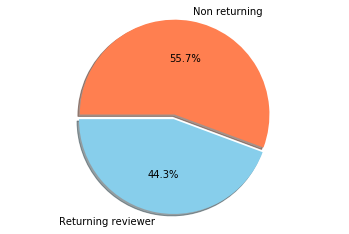

Top 20 users (and their no. of ratings) are as follows:


11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
212898     4289
278418     3996
76352      3329
110973     2971
235105     2943
16795      2920
230522     2857
234623     2594
204864     2461
36836      2458
245963     2395
185233     2382
55492      2361
52584      2340
232131     2329
Name: User-ID, dtype: int64

In [23]:
id=final_df['User-ID'].value_counts()
#len(id)


#See, how many reviewers returned to review more:

not_frequent= np.count_nonzero(id.values == 1)
is_frequent = np.count_nonzero(id.values >1)

#pie plot showing the returning vs. non returning:

labels = 'Returning reviewer','Non returning'
sizes = [is_frequent, not_frequent]
colors = ['skyblue', 'coral']
explode = (0.05, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("1.png")
plt.show()

# Top 20 users:
print('Top 20 users (and their no. of ratings) are as follows:')
id[:20]

## 6.2 ISBN:

* 270151 unique different books (ISBN) have been listed. 
* Some books are very popular and been reviewd many times, however, some books are less popular. Just reviewed once.
* 46.1% of the total books have been reviewed at least more than once. However, 53.9% of books have been reviewed just once.
* The most popular book (ISBN = 0971880107) has been reviewed 2502 times.
* The next popular book (ISBN = 0316666343) has been reviewed 1295 times and so on.

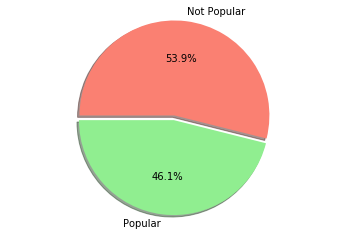

Top 20 books/ISBN (and corresponding no. of reviews) are as follows:


0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
059035342X     571
0316601950     568
0375727345     552
044021145X     529
0452282152     526
0440214041     523
0804106304     519
0440211727     517
0345337662     506
0060930535     494
Name: ISBN, dtype: int64

In [24]:
isbn=final_df['ISBN'].value_counts()

not_popular= np.count_nonzero(isbn.values == 1)
is_popular = np.count_nonzero(isbn.values >1)

#pie plot showing the returning vs. non returning:

labels = 'Popular','Not Popular'
sizes = [is_popular, not_popular]
colors = ['lightgreen', 'salmon']
explode = (0.05, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("2.png")
plt.show()

#len(final_df['ISBN'].unique())

# Top 20 books (ISBN):
print('Top 20 books/ISBN (and corresponding no. of reviews) are as follows:')
isbn[:20]

### 6.3 Ratings:

* These are the numerical features for rating the books.
* The scale is from '0-10'.
* 62.8 % of the times the rating is '0'. This is the most popular rating given by the reviewers.
* Next popular rating is '8'. This one has given 8.9% of times ; followed by '10' (6.9%)


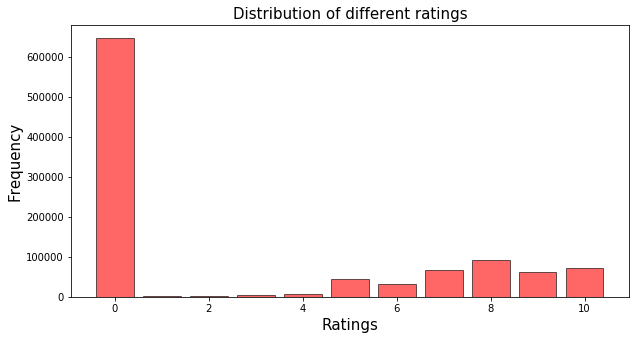

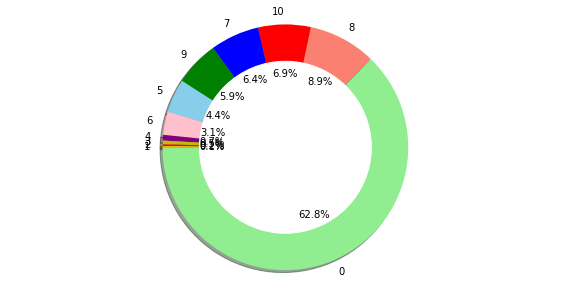

11

In [25]:
 rating = final_df['Book-Rating'].value_counts()

#Visually:
plt.figure(figsize=(10,5))
_=plt.bar(rating.index,rating.values,color='r',alpha=0.6,edgecolor='k')
plt.xlabel('Ratings',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of different ratings',fontsize=15)
plt.savefig("3.png")
plt.show()


#Donut plot:
plt.figure(figsize=(10,5))
#plt.title('Distribution of different ratings',fontsize=15)
labels = rating.index
sizes = rating.values
colors = ['lightgreen', 'salmon','r','b','g','skyblue','pink','purple','y','r','gold']
explode = (0, 0,0,0,0,0,0,0,0,0,0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('equal')
plt.savefig("4.png")
plt.show()

len(rating)

* It appears that the rating scale is actually from 1 to 10, and the 'zero' indicates an 'implicit' rather than an 'explicit' rating. An implicit rating represents an interaction (may be positive or negative) between the user and the item. So, we have splitte dthe dataframe into the explicit and implicit rating cases. 

* The 'rating_explicit' (only 1-10 rating scale) dataframe has 383842 rows, where as the 'rating_implicit' (only 0) has 647294 rows.

* Now, 23.9% of the rating is of score '8'.


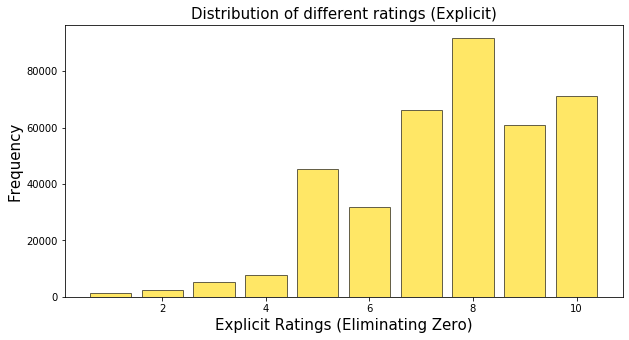

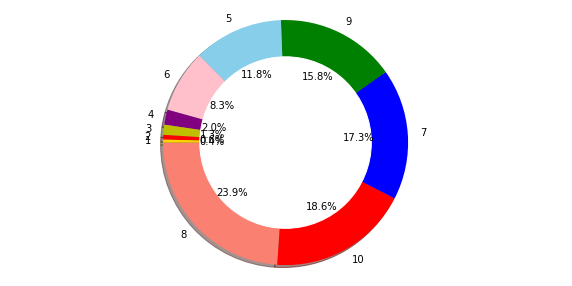

(383842, 9)
(647294, 9)


In [26]:
#Segragating implicit and explict ratings datasets:

ratings_explicit = final_df[final_df['Book-Rating'] != 0]
ratings_implicit = final_df[final_df['Book-Rating'] == 0]



rating_new=ratings_explicit['Book-Rating'].value_counts()

#Visually:
plt.figure(figsize=(10,5))
_=plt.bar(rating_new.index,rating_new.values,color='gold',alpha=0.6,edgecolor='k')
plt.xlabel('Explicit Ratings (Eliminating Zero)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of different ratings (Explicit)',fontsize=15)
plt.savefig("3a.png")
plt.show()


#Donut plot:
plt.figure(figsize=(10,5))
#plt.title('Distribution of different ratings',fontsize=15)
labels = rating_new.index
sizes = rating_new.values
colors = [ 'salmon','r','b','g','skyblue','pink','purple','y','r','gold']
explode = (0, 0,0,0,0,0,0,0,0,0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('equal')
plt.savefig("4a.png")
plt.show()


ratings_explicit.head()
print(ratings_explicit.shape)
print(ratings_implicit.shape)

### 6.4 Book- Title:

* These are the titles of the books, strings as object type.
* There are 241071 unique book titles enlisted. But, we saw that there are 270151 unique ISBNs (book identifier   code)out there. So, definitely 29080 books lack the title information in the metadata.


In [27]:
title=final_df['Book-Title'].value_counts()

len(final_df['Book-Title'].unique())

print('Top 20 book titles (and corresponding no. of reviews) are as follows:')
title[:20]

Top 20 book titles (and corresponding no. of reviews) are as follows:


Wild Animus                                                         2502
The Lovely Bones: A Novel                                           1295
The Da Vinci Code                                                    898
A Painted House                                                      838
The Nanny Diaries: A Novel                                           828
Bridget Jones's Diary                                                815
The Secret Life of Bees                                              774
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      740
The Red Tent (Bestselling Backlist)                                  723
Angels &amp; Demons                                                  670
Life of Pi                                                           664
Snow Falling on Cedars                                               662
The Summons                                                          655
The Notebook                                       

### 6.5 Book-author:

* There are unique 101588 different author names enlisted.
* The most famous/popular/reviwed author is **Stephen King** (10053 times reviewed).
* 51.5% of the total authors are 'popular', their books being reviewed at least more than once, where as 48.5% are not that popular. Their books are reviewed only once.
* There is one row, where the book-author name is the 'null'.

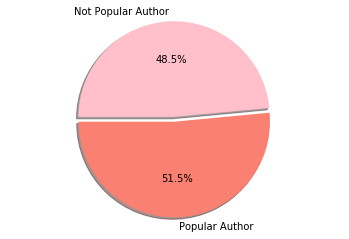

Top 20 authors (and corresponding no. of reviews) are as follows:


Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: Book-Author, dtype: int64

In [28]:
author= final_df['Book-Author'].value_counts()
#author

not_popular_author= np.count_nonzero(author.values == 1)
is_popular_author = np.count_nonzero(author.values >1)

#pie plot showing the returning vs. non returning:

labels = 'Popular Author','Not Popular Author'
sizes = [is_popular_author, not_popular_author]
colors = ['salmon', 'pink']
explode = (0.05, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("5.png")
plt.show()

#Null entree:
final_df['Book-Author'].isnull().sum()

print('Top 20 authors (and corresponding no. of reviews) are as follows:')
author[:20]

### 6.6 Year of Publication:

* This is a numerical feature, showing the year of the publication.
* In this column, there are many '0's and NaNs. We have replaced all zeros by NaNs.
* 115 unique years of publications are there.
* The oldest publication year recorded is: year 1376
* 2002 is the most popular year (Maximum no. of Books published in this year, 91800 times.)
* The latest year of publication = 2050!
* The plot shows the general trend that the more recent books are much more frequent in number.

1376.0
2050.0
1
91800


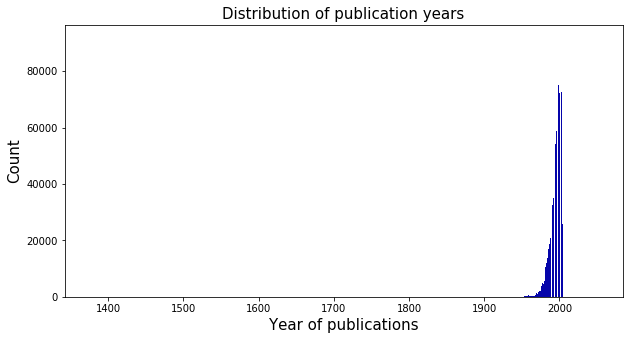

In [29]:
#final_df['Year-Of-Publication'].unique()
final_df['Year-Of-Publication'] = pd.to_numeric(final_df['Year-Of-Publication'], errors='coerce')
final_df[final_df['Year-Of-Publication'] == 0]['Year-Of-Publication'].count()
final_df['Year-Of-Publication'].replace(0, np.nan, inplace=True)

year = final_df['Year-Of-Publication'].value_counts()
print(year.index.min())
print(year.index.max())
print(year.values.min())
print(year.values.max())

#final_df['Year-Of-Publication'].isnull().sum()
#final_df.loc[final_df['Year-Of-Publication'] == 'DK Publishing Inc',:]
#final_df.loc[final_df['Year-Of-Publication'] == 'Gallimard',:]

#yr = final_df['Year-Of-Publication'].value_counts().sort_index()

#Visually:
plt.figure(figsize=(10,5))
_=plt.bar(year.index,year.values,color='#0504aa')
plt.xlabel('Year of publications',fontsize=15)
#plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.ylabel('Count',fontsize=15)
plt.title('Distribution of publication years',fontsize=15)
plt.savefig("6.png")
plt.show()

### 6.7 Publisher:

* 16729 publisher names are enlisted, out of them 572 are uniquely different.
* The most popular one is the 'Ballantine Books' (with 34724 books)
* 57.2% of the publishing houses are popular (books reviewed more than once)
* 42.8% of the publishers are not popular (books reviewed hardly once)

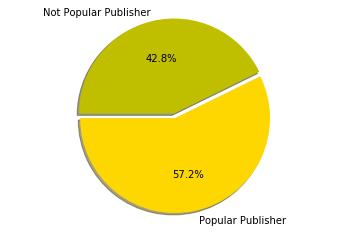

16729
572
Top 20 publishers (and corresponding no. of reviews) are as follows:


Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Jove Books                  15178
Silhouette                  14184
Dell                        13916
Scholastic                  13662
Perennial                   13466
Fawcett Books               12905
Dell Publishing Company     12733
HarperTorch                 12081
Vintage Books USA           11426
Simon &amp; Schuster        10318
Name: Publisher, dtype: int64

In [30]:
pub=final_df['Publisher'].value_counts()

not_popular_pub= np.count_nonzero(pub.values == 1)
is_popular_pub = np.count_nonzero(pub.values >1)

#pie plot showing the returning vs. non returning:

labels = 'Popular Publisher','Not Popular Publisher'
sizes = [is_popular_pub, not_popular_pub]
colors = ['gold', 'y']
explode = (0.05, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("7.png")
plt.show()

print(pub.sort_index().count())
print(len(pub.sort_index().unique()))

print('Top 20 publishers (and corresponding no. of reviews) are as follows:')
pub[:20]

### 6.8 Location:

* Categorical variable, featuring the geographic location of the reviewrs.
* Unique 762 locations (city,state,country) are there.
* The most popular location is: 'toronto, ontario, canada' and one of the least popular one: 'essex, grays, united kingdom'
* Splitted the information in three different columns - city, state and country for better understanding.
* 14670 unique cities enlisted from where the reviewers belong (including the 'NA')
* 1959 state information is there.
* 452 different countries are there.
* Toronto is the most popular city (15124 reviewers are alone from this town.) There are so many cities, from where only one rating has been listed (eg. hillsoboro)
* California is the most popular state (Total 107465 reviews); followed by Texas (44158)
* USA is the most popular (745052 reviews), followed by Canada (92917 reviews).
* Analyzing, it appears apparently that the ratings are not dependent on cities. (analyzed only 10 top cities)
* Analyzed the average age distribution across 10 top cities. 'Omaha' has the least average age, however 'Olympia' has the maximum spread in ages.

In [31]:
#Location split into three different columns:

location_expanded = final_df['Location'].str.split(',', 2, expand=True)

location_expanded.columns = ['city', 'state', 'country']
frame=[final_df,location_expanded]
final_df = pd.concat(frame,axis=1)
#final_df.drop(columns=['Location'], inplace=True)

final_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,city,state,country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,"tyler, texas, usa",NaN,tyler,texas,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986.0,Tor Books,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994.0,Vintage,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996.0,HarperCollins,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa


In [32]:
#Location wise:

location=final_df['Location'].value_counts()
len(location.unique())
location.index

Index(['toronto, ontario, canada', 'n/a, n/a, n/a', 'chicago, illinois, usa',
       'seattle, washington, usa', 'ottawa, ontario, canada',
       'olympia, washington, usa', 'omaha, nebraska, usa',
       'st. louis, missouri, usa', 'little canada, minnesota, usa',
       'duluth, minnesota, usa',
       ...
       'santos, são paulo, brazil', 'caithness, scotland, united kingdom',
       'artarmon, new south wales, australia', 'boursin, , france',
       'kenosee, saskatchewan, canada', 'dyer, indiana, usa',
       'annan, ontario, canada', 'redfield, iowa, usa', 'fairport, ohio, usa',
       'dublin 1, n/a, ireland'],
      dtype='object', length=22480)

In [33]:
#After splitting, City wise:

city=final_df['city'].value_counts()
state=final_df['state'].value_counts()
country=final_df['country'].value_counts()

print(city.values.min())
print(len(state.index.unique()))
print(len(country.index.unique()))


print('Top 20 cities (and corresponding no. of reviews) are as follows:')
city[:20]


#print('10 less popular cities (and corresponding no. of reviews) are as follows:' )
#city[:-10]

1
1959
452
Top 20 cities (and corresponding no. of reviews) are as follows:


toronto          15124
n/a              13844
chicago           9078
seattle           8605
ottawa            8330
olympia           8090
st. louis         7305
london            7290
omaha             7282
portland          7135
san diego         6626
little canada     6458
duluth            6428
ft. stewart       5820
new york          5790
morrow            5784
calgary           5564
vancouver         5371
houston           5267
oakland           5149
Name: city, dtype: int64

In [34]:
#State:
state=final_df['state'].value_counts()
print('Top 20 states (and corresponding no. of reviews) are as follows:')
state[:20]

Top 20 states (and corresponding no. of reviews) are as follows:


 california        107465
 texas              44158
 ontario            41440
 florida            34188
 missouri           33004
 washington         31940
 illinois           30596
 new york           29760
 virginia           27307
 georgia            26494
 minnesota          26144
 pennsylvania       24611
 north carolina     21170
 england            20948
                    20711
 ohio               19745
 oregon             19587
 n/a                19366
 michigan           18875
 new jersey         18846
Name: state, dtype: int64

In [35]:
#Country:
country=final_df['country'].value_counts()
print('Top 20 countries (and corresponding no. of reviews) are as follows:')
country[:20]

Top 20 countries (and corresponding no. of reviews) are as follows:


 usa               745052
 canada             92917
 united kingdom     32000
 germany            27654
                    24185
 australia          18213
 spain              14772
 n/a                11177
 france             10632
 portugal            6862
 new zealand         5554
 malaysia            5048
 netherlands         4969
 switzerland         4177
 italy               3457
 austria             2803
 iran                1649
 finland             1189
 romania             1168
 singapore           1144
Name: country, dtype: int64

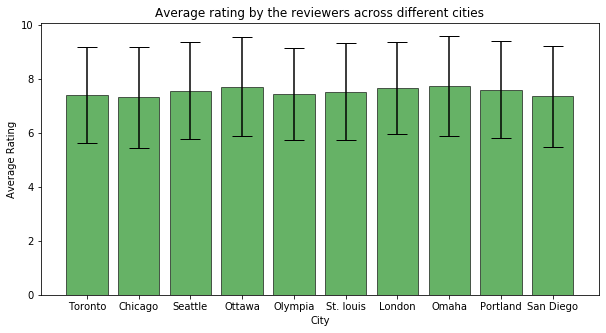

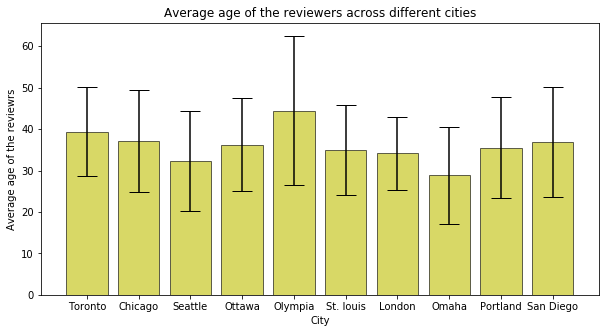

In [36]:
#city wise avg. rating (excluding zero):

city_df= final_df.groupby('city')

#Toronto:

tor=city_df.get_group('toronto')
final_tor = tor[tor['Book-Rating'] != 0]
tor_rating=final_tor['Book-Rating']
tor_age= final_tor['Age']
tor_rating_mean=tor_rating.mean()
tor_rating_std= tor_rating.std()
tor_age_mean=tor_age.mean()
tor_age_std=tor_age.std()

#chicago:
chi=city_df.get_group('chicago')
final_chi = chi[chi['Book-Rating'] != 0]
chi_rating=final_chi['Book-Rating']
chi_age= final_chi['Age']
chi_rating_mean=chi_rating.mean()
chi_rating_std=chi_rating.std()
chi_age_mean=chi_age.mean()
chi_age_std=chi_age.std()

#seattle:
sea=city_df.get_group('seattle')
final_sea = sea[sea['Book-Rating'] != 0]
sea_rating=final_sea['Book-Rating']
sea_age= final_sea['Age']
sea_rating_mean=sea_rating.mean()
sea_rating_std=sea_rating.std()
sea_age_mean=sea_age.mean()
sea_age_std=sea_age.std()

#ottawa:
ott=city_df.get_group('ottawa')
final_ott = ott[ott['Book-Rating'] != 0]
ott_rating=final_ott['Book-Rating']
ott_age= final_ott['Age']
ott_rating_mean=ott_rating.mean()
ott_rating_std=ott_rating.std()
ott_age_mean=ott_age.mean()
ott_age_std=ott_age.std()

#olympia:
oly=city_df.get_group('olympia')
final_oly = oly[oly['Book-Rating'] != 0]
oly_rating=final_oly['Book-Rating']
oly_age= final_oly['Age']
oly_rating_mean=oly_rating.mean()
oly_rating_std=oly_rating.std()
oly_age_mean=oly_age.mean()
oly_age_std=oly_age.std()

#st. louis:
stl=city_df.get_group('st. louis')
final_stl = stl[stl['Book-Rating'] != 0]
stl_rating=final_stl['Book-Rating']
stl_age= final_stl['Age']
stl_rating_mean=stl_rating.mean()
stl_rating_std=stl_rating.std()
stl_age_mean=stl_age.mean()
stl_age_std=stl_age.std()

#london:
lon=city_df.get_group('london')
final_lon = lon[lon['Book-Rating'] != 0]
lon_rating=final_lon['Book-Rating']
lon_age= final_lon['Age']
lon_rating_mean=lon_rating.mean()
lon_rating_std=lon_rating.std()
lon_age_mean=lon_age.mean()
lon_age_std=lon_age.std()

#omaha:
om=city_df.get_group('omaha')
final_om = om[om['Book-Rating'] != 0]
om_rating=final_om['Book-Rating']
om_age= final_om['Age']
om_rating_mean=om_rating.mean()
om_rating_std=om_rating.std()
om_age_mean=om_age.mean()
om_age_std=om_age.std()

#portland:
port=city_df.get_group('portland')
final_port = port[port['Book-Rating'] != 0]
port_rating=final_port['Book-Rating']
port_age= final_port['Age']
port_rating_mean=port_rating.mean()
port_rating_std=port_rating.std()
port_age_mean=port_age.mean()
port_age_std=port_age.std()

#san diego:
sand=city_df.get_group('san diego')
final_sand = sand[sand['Book-Rating'] != 0]
sand_rating=final_sand['Book-Rating']
sand_age= final_sand['Age']
sand_rating_mean=sand_rating.mean()
sand_rating_std=sand_rating.std()
sand_age_mean=sand_age.mean()
sand_age_std=sand_age.std()


#Visualize-1:
plt.figure(figsize=(10,5))
rating_city=[tor_rating_mean, chi_rating_mean, sea_rating_mean, ott_rating_mean, oly_rating_mean, stl_rating_mean, lon_rating_mean, om_rating_mean, port_rating_mean, sand_rating_mean]
city= ['Toronto','Chicago','Seattle','Ottawa','Olympia','St. louis','London','Omaha','Portland','San Diego']
error_city=[tor_rating_std, chi_rating_std, sea_rating_std, ott_rating_std, oly_rating_std, stl_rating_std, lon_rating_std, om_rating_std, port_rating_std, sand_rating_std]
_=plt.bar(city,rating_city,yerr=error_city, align='center',ecolor='black', capsize=10,color='g',alpha=0.6,edgecolor='k')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average rating by the reviewers across different cities')
plt.savefig("13.png")
plt.show()


#Visualize-2:
plt.figure(figsize=(10,5))
age_city=[tor_age_mean, chi_age_mean, sea_age_mean, ott_age_mean, oly_age_mean, stl_age_mean, lon_age_mean, om_age_mean, port_age_mean, sand_age_mean]
city= ['Toronto','Chicago','Seattle','Ottawa','Olympia','St. louis','London','Omaha','Portland','San Diego']
error_age_city=[tor_age_std, chi_age_std, sea_age_std, ott_age_std, oly_age_std, stl_age_std, lon_age_std, om_age_std, port_age_std, sand_age_std]
_=plt.bar(city,age_city,yerr=error_age_city, align='center',ecolor='black', capsize=10,color='y',alpha=0.6,edgecolor='k')
plt.xlabel('City')
plt.ylabel('Average age of the reviewrs')
plt.title('Average age of the reviewers across different cities')
plt.savefig("14.png")
plt.show()

city
                        3.720930
&#304;stanbul           0.000000
&#321;ód&#378;          3.500000
&#321;ód&#380;          9.000000
&#36149;&#28207;        0.000000
*                       6.000000
***********             1.234783
-                       3.135135
--                      0.000000
-----                   6.000000
---------               0.000000
.                       3.289362
..                      9.000000
...                     7.000000
.................      10.000000
0000000000000000        0.000000
000000000000000000      0.000000
0000largo               7.000000
01721                   0.000000
03770 el verger         7.000000
05680                   6.500000
10012                   8.000000
1110 lynnwood blvd.     4.333333
12279                   3.000000
14482 potsdam          10.000000
14971 deception rd.    10.000000
15526 reichenwalde      9.000000
16605 bennington ct     3.375000
19258 boizenburg        4.000000
20146 hamburg           8.000000
     

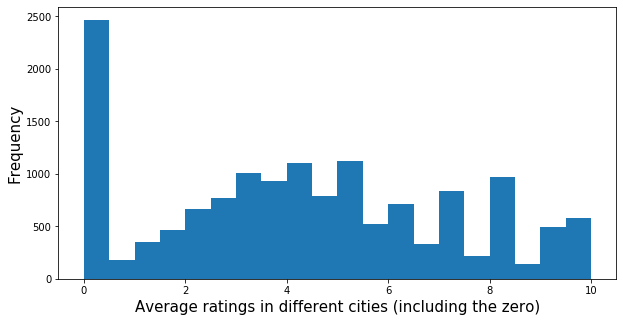

In [45]:
#Mean age across different cities

mean_city_age=final_df['Age'].groupby(final_df['city']).mean()
mean_city_rating=final_df['Book-Rating'].groupby(final_df['city']).mean()
#_=plt.plot(mean_city)
#plt.show()

print(mean_city_rating)
plt.figure(figsize=(10,5))
_=plt.hist(mean_city_rating,bins=20)
plt.xlabel('Average ratings in different cities (including the zero)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.savefig('15.png')
plt.show()

### 6.9 Age:

* This is a numeric column, featuring the age of the reviewers.
* There are 141 different unique age (of the reviewers) information enlisted.
* The minimum age = 0
* The maximum age = 244!
* So, a lot of them are unphysical/unrealistic! (eg. 0 and 244)
* So, Replaced the **unrealistic** ages (5 > age > 90) by NaN
* Total 4979 values got replaced by NaN.
* So, after the replacement, there are 84 different unique ages (reasonable) out there.
* For the new age group, the minimum = 5 (as we have set), the maximum = 90 and the mean = 37.047
* So, the mean age has decreased by 0.94%
* From the histogram of the age distribution, it's evident that the ditribution is skewed. The younger people review more than the older ones.


In [38]:
#Age as it was:
age= final_df['Age'].value_counts()

final_df['Age'].describe()

count    753301.000000
mean         37.397648
std          14.098254
min           0.000000
25%          28.000000
50%          35.000000
75%          45.000000
max         244.000000
Name: Age, dtype: float64

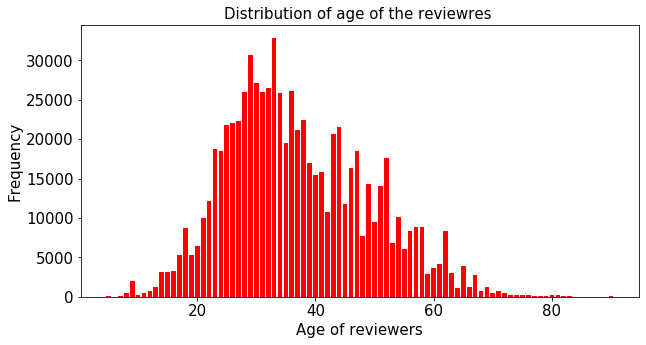

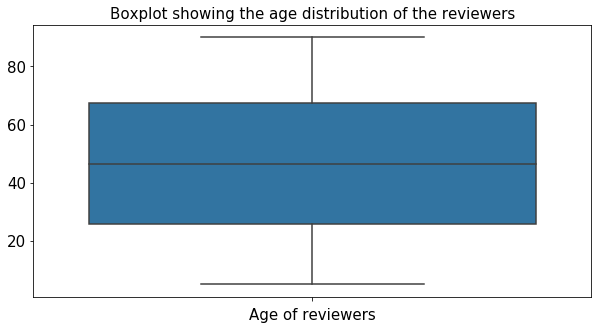

In [65]:
 # Replace the ages > 90 and <5 by NaN:

final_df.loc[(final_df['Age']< 5) | (final_df['Age']> 90), 'Age'] = np.nan

#final_df['Age'][final_df['Age'] > 90 & final_df['Age'] < 5] = np.nan
#mean_age= final_df['Age'].mean()
#final_df['Age'].describe()
age_new=final_df['Age'].value_counts()


#Visually:
plt.figure(figsize=(10,5))
_=plt.bar(age_new.index,age_new.values,color='r')
plt.xlabel('Age of reviewers',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of age of the reviewres ',fontsize=15)
plt.savefig("8.png")
plt.show()

#Boxplot showing the age distribution:

plt.figure(figsize=(10,5))
_=sns.boxplot(age_new.index,orient='v')
plt.xlabel('Age of reviewers',fontsize=15)
plt.title('Boxplot showing the age distribution of the reviewers',fontsize=15)
plt.savefig("9.png")
plt.show()

In [67]:
#Statistics after removing some unrealistic ages:
mean_age= final_df['Age'].mean()
final_df['Age'].describe()


count    748322.000000
mean         37.047242
std          12.049462
min           5.000000
25%          28.000000
50%          35.000000
75%          45.000000
max          90.000000
Name: Age, dtype: float64

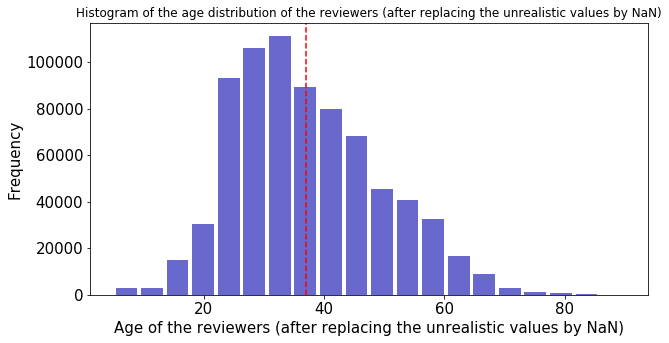

In [68]:
#Histogram:
plt.figure(figsize=(10,5))
_=plt.hist(final_df['Age'],bins=20,color='#0504aa', alpha=0.6, rwidth=0.85)
plt.axvline(x=mean_age, c='r', linestyle='--')
plt.xlabel('Age of the reviewers (after replacing the unrealistic values by NaN)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram of the age distribution of the reviewers (after replacing the unrealistic values by NaN)',fontsize=12)
plt.savefig("10.png")
plt.show()

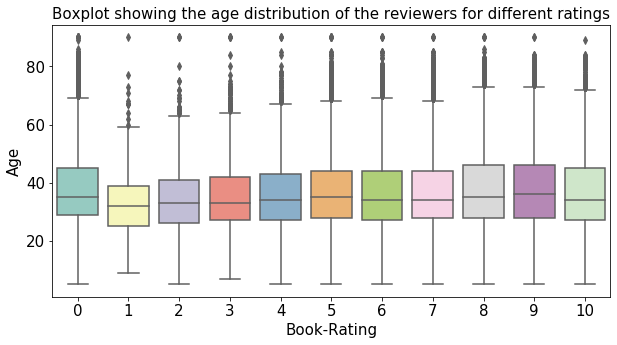

In [70]:
#To see if the age of the reviwers and the rating has any correlation
#final_df['Book-Rating'] = final_df[final_df['Book-Rating'] != 0]

plt.figure(figsize=(10,5))
_ = sns.boxplot(x="Book-Rating" , y="Age",data=final_df, palette="Set3")
plt.title('Boxplot showing the age distribution of the reviewers for different ratings',fontsize=15)
plt.savefig("11.png")
plt.show()

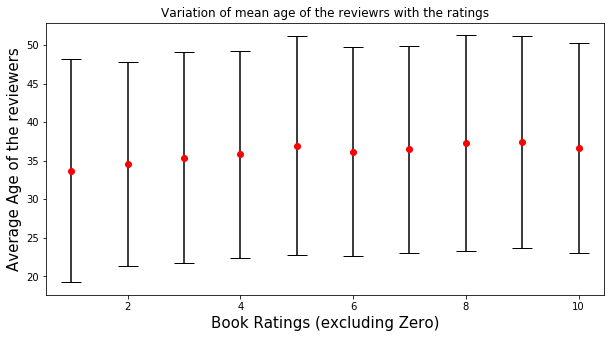

[14.471953782287684,
 13.228864350657402,
 13.634794230496244,
 13.412408724121645,
 14.184593079874427,
 13.52080540089509,
 13.404234618663061,
 13.973186636250038,
 13.757672209071053,
 13.63141008741105]

In [56]:
rating_group= final_df.groupby('Book-Rating')


#Rating-1
df_1=rating_group.get_group(1)
mean_1=df_1['Age'].mean()
std_1= df_1['Age'].std()

#Rating-2
df_2=rating_group.get_group(2)
mean_2=df_2['Age'].mean()
std_2= df_2['Age'].std()

#Rating-3
df_3=rating_group.get_group(3)
mean_3=df_3['Age'].mean()
std_3= df_3['Age'].std()

#Rating-4
df_4=rating_group.get_group(4)
mean_4=df_4['Age'].mean()
std_4= df_4['Age'].std()

#Rating-5
df_5=rating_group.get_group(5)
mean_5=df_5['Age'].mean()
std_5= df_5['Age'].std()

#Rating-6
df_6=rating_group.get_group(6)
mean_6=df_6['Age'].mean()
std_6= df_6['Age'].std()


#Rating-7
df_7=rating_group.get_group(7)
mean_7=df_7['Age'].mean()
std_7= df_7['Age'].std()

#Rating-8
df_8=rating_group.get_group(8)
mean_8=df_8['Age'].mean()
std_8= df_8['Age'].std()

#Rating-9
df_9=rating_group.get_group(9)
mean_9=df_9['Age'].mean()
std_9= df_9['Age'].std()

#Rating-10
df_10=rating_group.get_group(10)
mean_10=df_10['Age'].mean()
std_10= df_10['Age'].std()

#Visually:
plt.figure(figsize=(10,5))
rating=[1,2,3,4,5,6,7,8,9,10]
mean_age_rating=[mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10]
error=[std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9,std_10]

#_=plt.bar(rating,mean_age_rating,yerr=error, align='center',ecolor='black', capsize=10,color='salmon',alpha=0.7,edgecolor='k')
_=plt.errorbar(rating,mean_age_rating,yerr=error,fmt='o',color='r',ecolor='k',capsize=10)
plt.xlabel('Book Ratings (excluding Zero)',fontsize=15)
plt.ylabel('Average Age of the reviewers',fontsize=15)
plt.title('Variation of mean age of the reviewrs with the ratings')
plt.savefig("12.png")
plt.show()
error

* The average age of the reviewrs range from ~ 33-37 years, for all the rating bands.
* Error bars are roughly between 10-12 years.
* So, the conclusion is, rating is not age dependent. (mean age is almost same for all rating bands.)